<a href="https://colab.research.google.com/github/jceciliadev/Extract_data_pdf/blob/master/Pie_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
pip install ipywidgets

In [52]:
from ipywidgets import IntSlider
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ipywidgets import interact
from IPython.display import display


In [13]:
deaths_path = '/content/control_11.csv'
deaths_df = pd.read_csv(deaths_path, sep=";")
print(deaths_df)

     num_bien_dq  num_seguim_dq  ...          desc_finalidad  data_date_part
0            0.0   1.220321e+12  ...  RET. CIRCULAR BDE VMER      2021-05-26
1            0.0   1.220366e+12  ...          RECUP. SUBASTA      2021-05-26
2            0.0   1.220471e+12  ...    GARANTIA HIPOTECARIA      2021-05-26
3            0.0   1.220494e+12  ...    GARANTIA HIPOTECARIA      2021-05-26
4            0.0   1.220494e+12  ...    GARANTIA HIPOTECARIA      2021-05-26
..           ...            ...  ...                     ...             ...
538          0.0   1.220494e+12  ...    GARANTIA HIPOTECARIA      2021-05-26
539          0.0   1.220944e+12  ...    GARANTIA HIPOTECARIA      2021-05-26
540          0.0   1.221231e+12  ...    GARANTIA HIPOTECARIA      2021-05-26
541          0.0   1.220494e+12  ...    GARANTIA HIPOTECARIA      2021-05-26
542          0.0   1.220421e+12  ...          RECUP. SUBASTA      2021-05-26

[543 rows x 11 columns]


In [12]:
print('Cantidad de Filas y columnas:',deaths_df.shape)
print('Nombre columnas:',deaths_df.columns)

Cantidad de Filas y columnas: (543, 11)
Nombre columnas: Index(['num_bien_dq', 'num_seguim_dq', 'num_bien_it', 'num_seguim_it',
       'cod_incidencia_dq', 'error_tbl_it', 'flag_final_dq', 'check',
       'cod_finalidad', 'desc_finalidad', 'data_date_part'],
      dtype='object')


In [14]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_bien_dq        540 non-null    float64
 1   num_seguim_dq      540 non-null    float64
 2   num_bien_it        542 non-null    float64
 3   num_seguim_it      542 non-null    float64
 4   cod_incidencia_dq  540 non-null    float64
 5   error_tbl_it       542 non-null    float64
 6   flag_final_dq      540 non-null    object 
 7   check              543 non-null    object 
 8   cod_finalidad      543 non-null    int64  
 9   desc_finalidad     543 non-null    object 
 10  data_date_part     543 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 46.8+ KB


In [46]:
deaths_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cod_finalidad,543.0,3.688766,6.049672,1.0,1.0,1.0,1.0,19.0


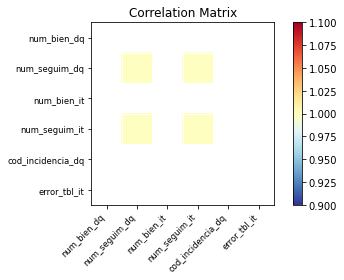

In [17]:
corr = deaths_df.set_index('cod_finalidad').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [ ]:
# verificar cuales valores son NaN o nulos (Null)
deaths_df.isna()


In [17]:
deaths_df.fillna('+',inplace=True)
cod_final=deaths_df[['cod_finalidad','desc_finalidad']]
print(cod_final.loc[:,['cod_finalidad','desc_finalidad']])

     cod_finalidad          desc_finalidad
0               19  RET. CIRCULAR BDE VMER
1               15          RECUP. SUBASTA
2                1    GARANTIA HIPOTECARIA
3                1    GARANTIA HIPOTECARIA
4                1    GARANTIA HIPOTECARIA
..             ...                     ...
538              1    GARANTIA HIPOTECARIA
539              1    GARANTIA HIPOTECARIA
540              1    GARANTIA HIPOTECARIA
541              1    GARANTIA HIPOTECARIA
542             15          RECUP. SUBASTA

[543 rows x 2 columns]


In [55]:
deaths_df['cod_finalidad'].unique()


array([19, 15,  1, 17, 14])

In [73]:
deaths_df['desc_finalidad'].unique()

array(['RET. CIRCULAR BDE VMER', 'RECUP. SUBASTA', 'GARANTIA HIPOTECARIA',
       'CIRCULAR BDE', 'RECUP. DACION EN PAGO'], dtype=object)

In [43]:

planets_2019 = deaths_df[deaths_df.cod_finalidad.isin([19,1])]
planets_2019

,num_bien_dq,num_seguim_dq,num_bien_it,num_seguim_it,cod_incidencia_dq,error_tbl_it,flag_final_dq,check,cod_finalidad,desc_finalidad,data_date_part
0,0,1.22032e+12,0,1.22032e+12,11,11,N,OK,19,RET. CIRCULAR BDE VMER,2021-05-26
2,0,1.22047e+12,0,1.22047e+12,11,11,N,OK,1,GARANTIA HIPOTECARIA,2021-05-26
3,0,1.22049e+12,0,1.22049e+12,11,11,N,OK,1,GARANTIA HIPOTECARIA,2021-05-26
4,0,1.22049e+12,0,1.22049e+12,11,11,N,OK,1,GARANTIA HIPOTECARIA,2021-05-26
5,0,1.22049e+12,0,1.22049e+12,11,11,N,OK,1,GARANTIA HIPOTECARIA,2021-05-26
...,...,...,...,...,...,...,...,...,...,...,...
537,0,1.22049e+12,0,1.22049e+12,11,11,N,OK,1,GARANTIA HIPOTECARIA,2021-05-26
538,0,1.22049e+12,0,1.22049e+12,11,11,N,OK,1,GARANTIA HIPOTECARIA,2021-05-26
539,0,1.22094e+12,0,1.22094e+12,11,11,N,OK,1,GARANTIA HIPOTECARIA,2021-05-26
540,0,1.22123e+12,0,1.22123e+12,11,11,N,OK,1,GARANTIA HIPOTECARIA,2021-05-26


In [78]:
#@title Example form fields
#@markdown Forms support many types of fields.
#@title ## Markdown
#@markdown You can also include Markdown in forms.

#@markdown ---
#@markdown ### Enter a file path:
file_path = "/home/janethc/Descargas/control_11.csv" #@param {type:"string"}
#@markdown ---
#@title After running this cell manually, it will auto-run if you change the selected value. { run: "auto" }

option2 = "B" #@param ["A", "B", "C"]
print('You selected', option2)


no_type_checking =   4125#@param)
string_type = ',uiyyu'  #@param {type: "string"}
slider_value = 100 #@param {type: "slider", min: 100, max: 200}
number = 10  #@param {type: "number"}
date = '2010-11-23'  #@param {type: "date"}
pick_me = "tuesday"  #@param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "apples" #@param ["apples", "bananas", "oranges"] {allow-input: true}
#@markdown ---


In [74]:
# Funcion1
def filtro1(Columna, x):
    return (df.loc[df[Columna]>x])
#funcion agrupar
def buscar_cod_finalidad(df,condiciones:list ,color='green'):
    df_filtratdo = df[df.cod_finalidad.isin(condiciones)]
    return df_filtratdo
    #funcion2
def filtro2(Columnas,columnas):
    return (df.loc[(df['desc_finalidad'] == Columnas) & (df['cod_finalidad'] == columnas)])    

 
   

In [63]:
buscar_cod_finalidad(deaths_df,[19,1,15])

,num_bien_dq,num_seguim_dq,num_bien_it,num_seguim_it,cod_incidencia_dq,error_tbl_it,flag_final_dq,check,cod_finalidad,desc_finalidad,data_date_part
0,0,1.22032e+12,0,1.22032e+12,11,11,N,OK,19,RET. CIRCULAR BDE VMER,2021-05-26
1,0,1.22037e+12,0,1.22037e+12,11,11,N,OK,15,RECUP. SUBASTA,2021-05-26
2,0,1.22047e+12,0,1.22047e+12,11,11,N,OK,1,GARANTIA HIPOTECARIA,2021-05-26
3,0,1.22049e+12,0,1.22049e+12,11,11,N,OK,1,GARANTIA HIPOTECARIA,2021-05-26
4,0,1.22049e+12,0,1.22049e+12,11,11,N,OK,1,GARANTIA HIPOTECARIA,2021-05-26
...,...,...,...,...,...,...,...,...,...,...,...
538,0,1.22049e+12,0,1.22049e+12,11,11,N,OK,1,GARANTIA HIPOTECARIA,2021-05-26
539,0,1.22094e+12,0,1.22094e+12,11,11,N,OK,1,GARANTIA HIPOTECARIA,2021-05-26
540,0,1.22123e+12,0,1.22123e+12,11,11,N,OK,1,GARANTIA HIPOTECARIA,2021-05-26
541,0,1.22049e+12,0,1.22049e+12,11,11,N,OK,1,GARANTIA HIPOTECARIA,2021-05-26


In [76]:

# create a slider
interact(my_function, x=20)

TypeError: ignored